<a href="https://colab.research.google.com/github/roque-alfaro/taller-eiv-2026/blob/main/1_Ejercicio_Extracci%C3%B3n_(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Extracción de Datos

En este ejercicio vamos a implementar el proceso de Extracción de una *ETL* para evaluar las brechas de consultas de especialidad en 2021 en el Servicio de Salud Metropolitano Sur Oriente. Para ello necesitamos:

1. Diseñar el área de trabajo (carpetas)
  - 📂 **Datos originales**: para este ejercicio usaremos https://github.com/rlagosb/taller_eiv/tree/main/data
  - 📂 **Datos crudos**: crearemos una carpeta en el ambiente de Colab
  - 📂 Datos normalizados (ejercicio 2)
  - 📂 Datos análisis (ejercicio 3)
2. Configurar el área de trabajo del script de Extracción
3. Cargar archivos desde la carpeta de Datos originales
4. Filtrar campos o filas innecesarios
5. Guardar los extractos en Datos crudos


# Configuración del área de trabajo

In [40]:
# Importar librerías
import pandas as pd
import os

In [41]:
# Definir carpetas de trabajo
datos_originales = 'https://github.com/rlagosb/taller_eiv/raw/refs/heads/main/data/'
datos_crudos = '/content/datos_crudos/'

# Crear carpeta de trabajo
if not os.path.exists(datos_crudos): os.makedirs(datos_crudos)

# Extraer REM A07 año 2021

Usaremos los Resúmenes Estadísticos Mensuales (REM) del DEIS disponibles en https://deis.minsal.cl/#datosabiertos

🔍 Los REM son informes que presentan estadísticas de producción sobre diferentes prestaciones agrupadas por región, servicio y establecimiento de salud de la red pública ([DEIS](https://deis.minsal.cl/faqs/#1719866882683-6648a718-aa6b)).

☕ Vamos a cargar los datos en un Dataframe

In [42]:
# Cargar csv de github
url_remA07 = datos_originales + 'rem_A07_2021.txt' #  Para cargar la base de datos, se utiliza la dirección de GitHub previamente definida y se incorpora el nombre del archivo a utilizar (cargar).
rem = pd.read_csv(url_remA07,sep=";") # valores se encuentran separados por punto y comas

In [43]:
# Revisar número de registros y tipo de campos
rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231114 entries, 0 to 231113
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         231114 non-null  int64  
 1   Mes                231114 non-null  int64  
 2   Ano                231114 non-null  int64  
 3   IdEstablecimiento  231114 non-null  int64  
 4   CodigoPrestacion   231114 non-null  int64  
 5   IdRegion           231114 non-null  int64  
 6   IdServicio         231114 non-null  int64  
 7   IdComuna           231114 non-null  int64  
 8   Col01              231096 non-null  float64
 9   Col22              231093 non-null  float64
 10  Col26              231096 non-null  float64
 11  Col32              38220 non-null   float64
 12  Col33              39488 non-null   float64
 13  Col41              16177 non-null   float64
 14  Col37              29225 non-null   float64
 15  Col38              34367 non-null   float64
dtypes:

In [44]:
# Ver una muestra aleatoria de 10 filas
rem.sample(10)

,Unnamed: 0,Mes,Ano,IdEstablecimiento,CodigoPrestacion,IdRegion,IdServicio,IdComuna,Col01,Col22,Col26,Col32,Col33,Col41,Col37,Col38
225139,4608616,10,2021,104307,7023203,3,4,3101,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
171290,3522459,10,2021,115717,7023700,6,15,6301,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
204944,4211976,1,2021,117308,7020600,16,17,16108,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
131154,2685471,4,2021,105104,7023701,4,5,4204,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
132860,2722863,2,2021,105722,7020500,4,5,4301,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
220142,4516424,5,2021,107308,7020500,5,7,5801,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
155456,3199477,4,2021,107328,7021900,5,7,5804,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
62952,1324346,10,2021,110425,7022142,13,10,13603,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
198647,4062139,3,2021,116522,7023200,7,16,7404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219182,4502673,4,2021,107318,7023203,5,7,5501,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Vamos a examinar los datos de consultas para lo cual utilizamos el diccionario REM A07, Sección Consultas Médicas (archivo [SA_21_V1.2-CODIGOS.xlsx](https://github.com/rlagosb/taller_eiv/blob/eeab96f341a1338e8fa81c489afa1ad98dde7f65/data/SA_21_V1.2-CODIGOS.xlsx) en *datos_originales*)

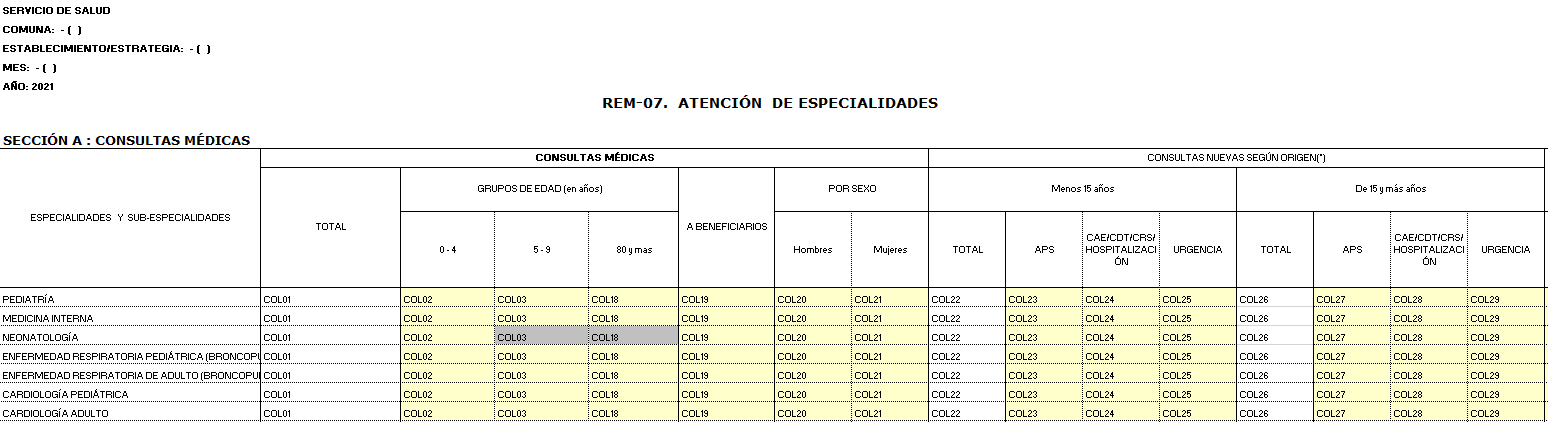

In [45]:
# Ver la distribución de las consultas
# Tomamos las columnas [filas, columnas] Consultas, Consultas Nuevas < 15 años
# y Consultas Nuevas >= 15 años y generamos un resumen de sus datos

rem[['Col01','Col22','Col26']].describe()

,Col01,Col22,Col26
count,231096.000000,231093.000000,231096.000000
mean,28.577647,1.535763,6.994747
std,125.390869,11.942315,40.527429
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4602.000000,554.000000,1929.000000


In [46]:
# Contar registros por Servicio de Salud
rem['IdServicio'].value_counts()

,count
IdServicio,
16,17419
15,16075
13,14581
14,13643
7,13087
10,12576
21,12538
5,12219
9,10185


In [47]:
# Contar registros de hospitales del Servicio de Salud Metropolitano Sur Oriente (IdServicio=14)
rem['IdEstablecimiento'][rem.IdServicio==14].value_counts()

,count
IdEstablecimiento,
114101,619
114105,588
114103,501
114301,454
114322,411
114332,400
114321,379
114320,368
114323,355


In [48]:
# Filtramos los datos de los hospitales del SSMSO
rem = rem[rem.IdServicio==14]

# Mostrar número de registros y una muestra
print(rem.info())
rem.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 13643 entries, 1135 to 147705
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13643 non-null  int64  
 1   Mes                13643 non-null  int64  
 2   Ano                13643 non-null  int64  
 3   IdEstablecimiento  13643 non-null  int64  
 4   CodigoPrestacion   13643 non-null  int64  
 5   IdRegion           13643 non-null  int64  
 6   IdServicio         13643 non-null  int64  
 7   IdComuna           13643 non-null  int64  
 8   Col01              13643 non-null  float64
 9   Col22              13643 non-null  float64
 10  Col26              13643 non-null  float64
 11  Col32              1977 non-null   float64
 12  Col33              2026 non-null   float64
 13  Col41              169 non-null    float64
 14  Col37              1164 non-null   float64
 15  Col38              1591 non-null   float64
dtypes: float64(8), int64(8)

,Unnamed: 0,Mes,Ano,IdEstablecimiento,CodigoPrestacion,IdRegion,IdServicio,IdComuna,Col01,Col22,Col26,Col32,Col33,Col41,Col37,Col38
65223,1377581,3,2021,114322,7020500,13,14,13201,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
145203,2963523,11,2021,114330,7020700,13,14,13110,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
65517,1381537,2,2021,114103,7020501,13,14,13131,33.0,8.0,0.0,1.0,5.0,NaN,NaN,NaN
146213,2978641,12,2021,114103,7023203,13,14,13131,808.0,18.0,106.0,52.0,116.0,NaN,16.0,43.0
72097,1497715,1,2021,114301,7021230,13,14,13201,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [49]:
# Exportar a Excel
# con la base de datos rem, se exportan a la ubicación concatenada de datos crudos + nombre de archivo
rem.to_excel(datos_crudos + 'rem_A07_2021_SSMSO.xlsx',index=False)

# también exportamos con formato de extensión *.parquet
rem.to_parquet(datos_crudos + 'rem_A07_2021_SSMSO.parquet')

## 🏁 Discusión
¿Cuáles son los riesgos de modificar los datos originales en esta etapa (ejemplo: cambiar nombres de las columnas, filtrar registros)?

# Extraer solicitudes de interconsulta SIGTE

In [50]:
# Cargar hojas de excel en dataframes

# concatenamos para definir la dirección excel_url, la cual almacena la dirección del archivo a analizar.
excel_url = datos_originales + 'SS_MSOr_Respuesta%20Solicitud%20Folio%20AO012T0001655%20(CNE%202021).xlsx'

#importamos desde esa url la hoja del excel llamada LE ABIERTA y posteriormente CNE EGRESOS
sic1 = pd.read_excel(excel_url,sheet_name='LE ABIERTA ')
sic2 = pd.read_excel(excel_url,sheet_name='CNE EGRESOS')

#exploramos los datos y sus propiedades
print(sic1.info(), end='\n\n') # agregamos dos espacios para separar las tablas
print(sic2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   FECHA_NAC   2499 non-null   datetime64[ns]
 1   SEXO        2499 non-null   int64         
 2   TIPO_PREST  2499 non-null   int64         
 3   PRESTA_MIN  2499 non-null   object        
 4   PRESTA_EST  2499 non-null   object        
 5   F_ENTRADA   2499 non-null   datetime64[ns]
 6   ESTAB_ORIG  2499 non-null   int64         
 7   ESTAB_DEST  2499 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 156.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149479 entries, 0 to 149478
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   FECHA_NAC   149479 non-null  object        
 1   SEXO        149479 non-null  int64         
 2   TIPO_PREST  149479 non-nul

In [51]:
# Juntar dataframes y ver resultante
sic = pd.concat([sic1,sic2])

print(sic.info())
sic.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 151978 entries, 0 to 149478
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   FECHA_NAC   151978 non-null  object        
 1   SEXO        151978 non-null  int64         
 2   TIPO_PREST  151978 non-null  int64         
 3   PRESTA_MIN  151978 non-null  object        
 4   PRESTA_EST  151978 non-null  object        
 5   F_ENTRADA   151978 non-null  datetime64[ns]
 6   ESTAB_ORIG  151978 non-null  int64         
 7   ESTAB_DEST  151978 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 10.4+ MB
None


,FECHA_NAC,SEXO,TIPO_PREST,PRESTA_MIN,PRESTA_EST,F_ENTRADA,ESTAB_ORIG,ESTAB_DEST
86901,18231,2,1,07-044,OFTALMOLOGIA ADULTO,2021-10-08,114101,114101
79159,41915,2,1,07-009,CIRUGIA INFANTIL,2021-09-13,114101,114101
126038,18338,1,1,07-030,Medicina Interna,2021-06-16,114103,114103
45274,21452,2,1,07-029,UMFR - Fisiatra,2021-06-08,200282,200282
113426,39774,1,1,07-055,Cardiologia Infantil,2021-05-19,114103,114103


In [52]:
# Ver establecimientos de destino con más derivaciones
sic['ESTAB_DEST'].value_counts()

,count
ESTAB_DEST,
114101,76354
114105,28807
114103,27543
200282,17928
114308,655
114323,555
114331,66
114407,19
114306,15


In [53]:
# Filtrar derivaciones a hospitales del SSMSO
# se crea el vector centros que almacena los códigos de los hospitales pertenecientes al SSMSO

centros = [114101,114103,114105,200282] # Sótero del Río, Padre Hurtado, La Florida, Provincia Cordillera

# Se filtra la base, buscando las filas en las que
# el código del Establecimiento (ESTAB_DEST) se encuentran (isin) en el vector de centros.
sic = sic[sic.ESTAB_DEST.isin(centros)]

# Mostrar número de registros y una muestra
print(sic.info())
sic.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 150632 entries, 0 to 149475
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   FECHA_NAC   150632 non-null  object        
 1   SEXO        150632 non-null  int64         
 2   TIPO_PREST  150632 non-null  int64         
 3   PRESTA_MIN  150632 non-null  object        
 4   PRESTA_EST  150632 non-null  object        
 5   F_ENTRADA   150632 non-null  datetime64[ns]
 6   ESTAB_ORIG  150632 non-null  int64         
 7   ESTAB_DEST  150632 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 10.3+ MB
None


,FECHA_NAC,SEXO,TIPO_PREST,PRESTA_MIN,PRESTA_EST,F_ENTRADA,ESTAB_ORIG,ESTAB_DEST
88670,38797,2,1,07-038,NEFROLOGIA INFANTIL,2021-12-06,114101,114101
115720,26634,1,1,09-011,PROTESIS REMOVIBLE,2021-07-07,114326,200282
141837,13606,2,1,07-021,Geriatria,2021-11-18,114103,114103
121543,19662,1,1,07-053,Traumatologia,2021-09-10,114302,114105
35339,31516,2,1,07-056,CIRUGIA ABDOMINAL,2021-05-24,114101,114101


## 🍎 Desafío: Exportar extracto

Exporte los datos a la carpeta *datos_crudos* con los formatos:
1. `xlsx`
2. `csv`
3. `parquet`

☕ Nota: si no recuerda los comandos puede usar la IA para generarlos.

In [54]:
import os

# 1) Asegurar carpeta de salida
out_dir = "/content/datos_crudos"
os.makedirs(out_dir, exist_ok=True)

# 2) Nombres de archivo
base = os.path.join(out_dir, "extracto_consultas_especialidad_2021_suroriente")

# 3) Exportar CSV
sic.to_csv(base + ".csv", index=False, encoding="utf-8")

# 4) Exportar Excel (xlsx)
sic.to_excel(base + ".xlsx", index=False)

# 5) Exportar Parquet (requiere pyarrow o fastparquet)
try:
    sic.to_parquet(base + ".parquet", index=False)
except Exception as e:
    !pip -q install pyarrow
    sic.to_parquet(base + ".parquet", index=False)

# 6) Verificar que quedaron
os.listdir(out_dir)

['extracto_consultas_especialidad_2021_suroriente.parquet',
 'extracto_consultas_especialidad_2021_suroriente.csv',
 'programacion_2021_SSMSO.xlsx',
 'extracto_consultas_especialidad_2021_suroriente.xlsx',
 'rem_A07_2021_SSMSO.xlsx',
 'rem_A07_2021_SSMSO.parquet']

### 🏁 Discusión

1. ¿Cuál formato es el archivo de menor tamaño?
2. ¿Cuál le parece más amigable para consultar?
3. ¿Cuál formato preferiría para almacenar los datos crudos?

# Extraer proyecciones de consultas de planillas de programación
Ahora realizaremos lo siguiente:
1. Recolección:
  - Cargar múltiples planillas en una carpeta
  - Agregar nombre de archivo
2. Consolidación
  - Unir en un dataframe
  - Exportar datos crudos (preprocesados) en excel/parquet

In [55]:
# definimos carpeta de origen y listado de archivos a consolidar

# Observe que en el repositorio de Github, los datos se encuentran en una subcarpeta
# concatenamos datos_originales con programacion
datos_programacion = datos_originales + 'programacion/'

#definimos un vector con nombres de plantillas
planillas = ['114105_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx',
             '114101_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx',
             '114103_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx',
             '200282_Planilla_programacion_PM_y_PNM_2021_FN_v12.xlsx']

In [56]:
# cargar planillas

# creamos un dataframe vacío para consolidar los datos
consolidado = pd.DataFrame()

# leemos cada nombre de planilla
for nombre_planilla in planillas:

  # cargamos los datos de la planilla en un dataframe
  datos = pd.read_excel(datos_programacion+nombre_planilla,
                        sheet_name='Resumen Programación',
                        header=2,       # tabla empieza en la fila 3
                        usecols="B:E")  # sólo cargar datos de la columnas B:E

  # agregamos el nombre de la planilla para tener la trazabilidad del dato
  datos['Archivo'] = nombre_planilla

  # agregamos los datos al consolidado
  consolidado = pd.concat([consolidado,datos])

# revisamos la información del consolidado
print(consolidado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Especialidad  Medica  256 non-null    object
 1   Consulta Nueva        260 non-null    int64 
 2   Consulta controles    260 non-null    int64 
 3   Total                 260 non-null    int64 
 4   Archivo               260 non-null    object
dtypes: int64(3), object(2)
memory usage: 12.2+ KB
None


In [57]:
# revisamos una muestra
consolidado.sample(5)

,Especialidad Medica,Consulta Nueva,Consulta controles,Total,Archivo
50,TRAUMATOLOGÍA Y ORTOPEDIA ADULTO,16961,7355,24316,114101_Planilla_programacion_PM_y_PNM_2021_FN_...
22,INFECTOLOGÍA ADULTO,0,0,0,200282_Planilla_programacion_PM_y_PNM_2021_FN_...
47,OFTALMOLOGÍA,21343,6026,27369,114101_Planilla_programacion_PM_y_PNM_2021_FN_...
14,NEFROLOGÍA PEDIÁTRICA,806,723,1529,114105_Planilla_programacion_PM_y_PNM_2021_FN_...
64,NaN,27692,18782,46474,200282_Planilla_programacion_PM_y_PNM_2021_FN_...


In [58]:
# exportamos a excel o formato preferido
consolidado.to_excel(datos_crudos + 'programacion_2021_SSMSO.xlsx',index=False)

## 🏁 Discusión

1. ¿Qué beneficios tiene guardar los datos crudos aparte de los archivos originales?
2. ¿Cuándo puede ser innecesario?
3. ¿Qué ventajas y deventajas tiene hacer esta tarea en excel?
4. ¿Qué ventajas y desventajas tiene hacer esta tarea con un lenguaje de programación?

# 🍎 Desafío: Extraer establecimientos

1. Obtenga la base de establecimientos de salud del DEIS, ubicada en la dirección: https://repositoriodeis.minsal.cl/DatosAbiertos/Establecimientos%20DEIS%20MINSAL%2007-01-2026.xlsx
  - ⚠ Note que el archivo tiene un título en la primera fila
2. Almacene el extracto en la carpeta *datos_crudos* en un formato rápido de cargar

In [59]:
import pandas as pd

url = "https://repositoriodeis.minsal.cl/DatosAbiertos/Establecimientos%20DEIS%20MINSAL%2007-01-2026.xlsx"
in_path = url # Use the URL directly

xls = pd.ExcelFile(in_path)
print("Hojas:", xls.sheet_names)

df_test = pd.read_excel(in_path, sheet_name=xls.sheet_names[0], nrows=5, header=None)
print(df_test)

Hojas: ['ESTABLECIMIENTO_2026-01-07', 'reglas de validación de datos', 'Establecimientos Cerrados', 'Hoja4', 'Diccionario Base de Datos', 'Tabla']
                                0               1                      2   \
0  BASE_ESTABLECIMIENTO_2026-01-07             NaN                    NaN   
1                  Código Antiguo   Código Vigente  Código  Madre Antiguo   
2                           26-704          126704                    NaN   
3                           26-204          126204                    NaN   
4                           26-412          126412                    NaN   

                   3              4   \
0                 NaN            NaN   
1  Código Madre Nuevo  Código Región   
2                 NaN             12   
3                 NaN             12   
4                 NaN             12   

                                               5   \
0                                             NaN   
1                                   Nombre 

In [60]:
import os
import pandas as pd

url = "https://repositoriodeis.minsal.cl/DatosAbiertos/Establecimientos%20DEIS%20MINSAL%2007-01-2026.xlsx"
sheet = "ESTABLECIMIENTO_2026-01-07"

out_dir = "/content/datos_crudos"
os.makedirs(out_dir, exist_ok=True)

raw = pd.read_excel(url, sheet_name=sheet, header=None)

header_row = raw.index[raw.iloc[:, 0].astype(str).str.strip().eq("Código Antiguo")]
if len(header_row) == 0:
    raise ValueError("No encontré la fila de encabezados con 'Código Antiguo'.")
header_row = int(header_row[0])

df_estab = pd.read_excel(url, sheet_name=sheet, header=header_row)

# Limpiar nombres de columnas
df_estab.columns = (
    df_estab.columns.astype(str)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# Ensure all object-type columns that contain non-numeric data are converted to string
# This is more robust than just checking for 'Código' in the name.
for col in df_estab.select_dtypes(include='object').columns:
    # Check if the column can be entirely converted to numeric. If not, it has non-numeric strings.
    if not pd.to_numeric(df_estab[col], errors='coerce').notna().all():
        df_estab[col] = df_estab[col].astype("string") # 'string' dtype handles <NA> well

out_path = os.path.join(out_dir, "establecimientos_deis_2026-01-07.parquet")

try:
    df_estab.to_parquet(out_path, index=False)
except Exception:
    import sys
    !{sys.executable} -m pip -q install pyarrow
    df_estab.to_parquet(out_path, index=False)

print("✅ Guardado en:", out_path)
print("Shape:", df_estab.shape)
df_estab.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


✅ Guardado en: /content/datos_crudos/establecimientos_deis_2026-01-07.parquet
Shape: (5148, 32)


,Código Antiguo,Código Vigente,Código Madre Antiguo,Código Madre Nuevo,Código Región,Nombre Región,Código Dependencia Jerárquica (SEREMI / Servicio de Salud),Nombre Dependencia Jerárquica (SEREMI / Servicio de Salud),Pertenencia al SNSS,Tipo Establecimiento (Unidad),...,Tiene Servicio de Urgencia,Tipo de Urgencia,Clasificación Tipo de SAPU,LATITUD [Grados decimales],LONGITUD [Grados decimales],Tipo de Prestador Sistema de Salud,Estado de Funcionamiento,Nivel de Complejidad,Tipo de Atención,Fecha de Incorporación a la base
0,26-704,126704,<NA>,<NA>,12,Región de Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,Hospital,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.93521,-67.60039,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria,<NA>
1,26-204,126204,<NA>,<NA>,12,Región de Magallanes y de la Antártica Chilena,12,SEREMI de Magallanes y la Antártica Chilena,No perteneciente al Sistema Nacional de Servic...,Hospital,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.934374,-67.608895,Fuerzas Armadas y de Orden,Vigente en operación habitual,Mediana Complejidad,Atención Cerrada-Hospitalaria,2022-10-07 00:00:00
2,26-412,126412,<NA>,<NA>,12,Región de Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,Posta de Salud Rural (PSR),...,NO,No Aplica,No Aplica,-53.64055,-69.64585,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,<NA>
3,26-414,126414,<NA>,<NA>,12,Región de Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,Posta de Salud Rural (PSR),...,NO,No Aplica,No Aplica,-53.40424,-70.99016,Público,Vigente en operación habitual,Baja Complejidad,Atención Abierta-Ambulatoria,<NA>
4,26-102,126102,<NA>,<NA>,12,Región de Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,Hospital,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-53.29816,-70.35838,Público,Vigente en operación habitual,Baja Complejidad,Atención Cerrada-Hospitalaria,<NA>


# ANEXOS

# 📎ANEXO: Extraer REM 2021

Extracción de Resúmenes Estadísticos Mensuales (REM) del año 2021 disponibles en https://deis.minsal.cl/#datosabiertos

In [61]:
# REM 2021
url='https://repositoriodeis.minsal.cl/DatosAbiertos/REM/SERIE_REM_2021.zip'

In [62]:
# prompt: get file names from zip file in url

import requests
import zipfile
from io import BytesIO

def get_filenames_from_zip_url(url):
    """
    Retrieves a list of filenames from a zip file located at a given URL.

    Args:
        url: The URL of the zip file.

    Returns:
        A list of filenames contained within the zip file, or None if an error occurs.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        with zipfile.ZipFile(BytesIO(response.content)) as z:
            return z.namelist()
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")
        return None
    except zipfile.BadZipFile:
        print("Error: Invalid zip file.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


filenames = get_filenames_from_zip_url(url)

if filenames:
    print("Filenames in the ZIP archive:")
    for filename in filenames:
        print(filename)
else:
    print("Could not retrieve filenames from the ZIP archive.")


Filenames in the ZIP archive:
2021/
2021/DICCIONARIOS/
2021/DICCIONARIOS/SA_21_V1.2-CODIGOS.xlsm
2021/DICCIONARIOS/SBM_21_V1.0-CODIGOS.xlsm
2021/DICCIONARIOS/SBS_21_V1.0 CODIGOS.xlsm
2021/DICCIONARIOS/SD_21_V1.0-CODIGOS.xlsm
2021/DICCIONARIOS/SP_21_V1.1 CODIGOS.xlsm
2021/SerieA_2021.txt
2021/SerieBM_2021.txt
2021/SerieBS_2021.txt
2021/SerieD_2021.txt
2021/SerieP_2021.txt


In [63]:
# prompt: read txt file '2021/SerieA_2021.txt' from zipped file

import requests
import zipfile
from io import BytesIO

# ... (Your existing code for downloading and listing files) ...

def read_txt_from_zip(url, filename):
    """Reads a text file from within a zip archive located at a given URL.

    Args:
      url: The URL of the zip file.
      filename: The name of the text file within the zip archive.

    Returns:
      A pandas DataFrame containing the data from the text file,
      or None if an error occurs.
    """
    try:
      response = requests.get(url, stream=True)
      response.raise_for_status()

      with zipfile.ZipFile(BytesIO(response.content)) as z:
          with z.open(filename) as f:
              df = pd.read_csv(f, sep=";",low_memory=False) # Adjust separator if needed
              return df
    except KeyError:
        print(f"Error: File '{filename}' not found in the zip archive.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

# Example usage:
df = read_txt_from_zip(url, '2021/SerieA_2021.txt')

if df is not None:
    print(df.head())

   Mes  IdServicio   Ano  IdEstablecimiento CodigoPrestacion  IdRegion  \
0    7          11  2021             111607         06020201        13   
1    7          11  2021             111607         06020208        13   
2    8          11  2021             111609         06901600        13   
3    8          11  2021             111609         06902300        13   
4    8          11  2021             111609         05970020        13   

   IdComuna Col01 Col02 Col03  ... Col41 Col42 Col43 Col44 Col45 Col46 Col47  \
0     13119    55    30    25  ...     0   0.0   NaN   NaN   NaN   NaN   NaN   
1     13119  1013   406   607  ...     0   0.0   NaN   NaN   NaN   NaN   NaN   
2     13101     3     2     1  ...     0   0.0     0   NaN   NaN   NaN   NaN   
3     13101     5     0     5  ...     0   1.0     0   NaN   NaN   NaN   NaN   
4     13101     1     0     1  ...     0   0.0     0   NaN   NaN   NaN   NaN   

  Col48 Col49 Col50  
0   NaN   NaN   NaN  
1   NaN   NaN   NaN  
2   NaN 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742691 entries, 0 to 4742690
Data columns (total 57 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Mes                int64  
 1   IdServicio         int64  
 2   Ano                int64  
 3   IdEstablecimiento  int64  
 4   CodigoPrestacion   object 
 5   IdRegion           int64  
 6   IdComuna           int64  
 7   Col01              object 
 8   Col02              object 
 9   Col03              object 
 10  Col04              object 
 11  Col05              object 
 12  Col06              object 
 13  Col07              object 
 14  Col08              object 
 15  Col09              object 
 16  Col10              object 
 17  Col11              object 
 18  Col12              object 
 19  Col13              object 
 20  Col14              object 
 21  Col15              object 
 22  Col16              object 
 23  Col17              object 
 24  Col18              object 
 25  Col19             

## Diccionario REM-07. ATENCIÓN DE ESPECIALIDADES
*Archivo: SA_21_V1.2-CODIGOS.xlsm*


- TOTAL CONSULTAS: COL01
- TOTAL CONSULTAS NUEVAS
  - COL22: TOTAL Menos 15 años
  - COL26: TOTAL De 15 y más años
- INASISTENTE A CONSULTA MÉDICA (NSP):
  - COL32 (NUEVAS)
  - COL33 (CONTROLES)
- COMPRA DE SERVICIO: COL41
- ALTA DE CONSULTA DE ESPECIALIDAD AMBULATORIA
  - COL37 "Menos 15 años"
  - COL38 "15 y más años"





In [65]:
def obtener_rem():
  # Filtrar columnas
  columnas=['Mes', 'Ano', 'IdEstablecimiento', 'CodigoPrestacion',
            'IdRegion', 'IdServicio', 'IdComuna',
            'Col01','Col22','Col26','Col32','Col33','Col41','Col37','Col38']
  rem = df[columnas].copy()

  # Filtrar prestaciones (consultas médicas REM A07)
  # {07020130:'PEDIATRÍA',07020230:'MEDICINA INTERNA',07020330:'NEONATOLOGÍA',07020331:'ENFERMEDAD RESPIRATORIA PEDIÁTRICA (BRONCOPULMONAR INFANTIL)',07020332:'ENFERMEDAD RESPIRATORIA DE ADULTO (BRONCOPULMONAR)',07024219:'CARDIOLOGÍA PEDIÁTRICA',07020500:'CARDIOLOGÍA ADULTO',07020501:'ENDOCRINOLOGÍA PEDIÁTRICA',07020600:'ENDOCRINOLOGÍA ADULTO',07020601:'GASTROENTEROLOGÍA PEDIÁTRICA',07020700:'GASTROENTEROLOGÍA ADULTO',07020800:'GENÉTICA CLÍNICA',07020801:'HEMATO-ONCOLOGÍA INFANTIL',07020900:'HEMATOLOGÍA ADULTO',07020901:'NEFROLOGÍA PEDIÁTRICA',07021000:'NEFROLOGÍA ADULTO',07021001:'NUTRIÓLOGO PEDIÁTRICO',07021100:'NUTRIÓLOGO ADULTO',07021101:'REUMATOLOGÍA PEDIÁTRICA',07021230:'REUMATOLOGÍA ADULTO',07021300:'DERMATOLOGÍA',07021301:'INFECTOLOGÍA PEDIÁTRICA',07022000:'INFECTOLOGÍA ADULTO',07022001:'INMUNOLOGÍA',07021531:'GERIATRÍA',07022132:'MEDICINA FÍSICA Y REHABILITACIÓN PEDIÁTRICA (FISIATRÍA PEDIÁTRICA)',07022133:'MEDICINA FÍSICA Y REHABILITACIÓN ADULTO (FISIATRÍA ADULTO)',07022134:'NEUROLOGÍA PEDIÁTRICA',07021700:'NEUROLOGÍA ADULTO',07021800:'ONCOLOGÍA MÉDICA',07021801:'PSIQUIATRÍA PEDIÁTRICA Y DE LA ADOLESCENCIA',07021900:'PSIQUIATRÍA ADULTO',07022130:'CIRUGÍA PEDIÁTRICA',07022142:'CIRUGÍA GENERAL ADULTO',07022143:'CIRUGÍA DIGESTIVA (ALTA)',07022144:'CIRUGÍA DE CABEZA, CUELLO Y MAXILOFACIAL',07022135:'CIRUGÍA PLÁSTICA Y REPARADORA PEDIÁTRICA',07022136:'CIRUGÍA PLÁSTICA Y REPARADORA ADULTO',07022137:'COLOPROCTOLOGÍA (CIRUGIA DIGESTIVA BAJA)',07022700:'CIRUGÍA TÓRAX',07022800:'CIRUGÍA VASCULAR PERIFÉRICA',07022900:'NEUROCIRUGÍA',07021701:'CIRUGÍA CARDIOVASCULAR',07023100:'ANESTESIOLOGÍA',07023200:'OBSTETRICIA',07023201:'GINECOLOGÍA PEDIÁTRICA Y DE LA ADOLESCENCIA',07023202:'GINECOLOGÍA ADULTO',07023203:'OFTALMOLOGÍA',07023700:'OTORRINOLARINGOLOGÍA',07023701:'TRAUMATOLOGÍA Y ORTOPEDIA PEDIÁTRICA',07023702:'TRAUMATOLOGÍA Y ORTOPEDIA ADULTO',07023703:'UROLOGÍA PEDIÁTRICA',07024000:'UROLOGÍA ADULTO',07024001:'MEDICINA FAMILIAR DEL NIÑO',07024200:'MEDICINA FAMILIAR',07030500:'MEDICINA FAMILIAR ADULTO',07024201:'DIABETOLOGÍA',07024202:'MEDICINA NUCLEAR (EXCLUYE INFORMES)',07030501:'IMAGENOLOGÍA',07030502:'RADIOTERAPIA ONCOLÓGICA'}
  prestaciones = ['07020130','07020230','07020330','07020331','07020332','07024219','07020500','07020501','07020600','07020601','07020700','07020800','07020801','07020900','07020901','07021000','07021001','07021100','07021101','07021230','07021300','07021301','07022000','07022001','07021531','07022132','07022133','07022134','07021700','07021800','07021801','07021900','07022130','07022142','07022143','07022144','07022135','07022136','07022137','07022700','07022800','07022900','07021701','07023100','07023200','07023201','07023202','07023203','07023700','07023701','07023702','07023703','07024000','07024001','07024200','07030500','07024201','07024202','07030501','07030502']
  rem = rem[rem.CodigoPrestacion.isin(prestaciones)]
  return rem

remA07 = obtener_rem()
print(remA07.info())
remA07.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 231114 entries, 39 to 4742227
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Mes                231114 non-null  int64 
 1   Ano                231114 non-null  int64 
 2   IdEstablecimiento  231114 non-null  int64 
 3   CodigoPrestacion   231114 non-null  object
 4   IdRegion           231114 non-null  int64 
 5   IdServicio         231114 non-null  int64 
 6   IdComuna           231114 non-null  int64 
 7   Col01              231096 non-null  object
 8   Col22              231093 non-null  object
 9   Col26              231096 non-null  object
 10  Col32              38220 non-null   object
 11  Col33              39488 non-null   object
 12  Col41              16177 non-null   object
 13  Col37              29225 non-null   object
 14  Col38              34367 non-null   object
dtypes: int64(6), object(9)
memory usage: 28.2+ MB
None


,Mes,Ano,IdEstablecimiento,CodigoPrestacion,IdRegion,IdServicio,IdComuna,Col01,Col22,Col26,Col32,Col33,Col41,Col37,Col38
1673891,5,2021,119100,07021800,8,19,8110,199,0,16,5,6,NaN,0,13
72416,5,2021,104309,07023202,3,4,3201,0,0,0,NaN,NaN,NaN,NaN,NaN
660825,6,2021,109304,07023701,13,9,13127,0,0,0,NaN,NaN,NaN,NaN,NaN
4056319,3,2021,200072,07021700,7,16,7101,0,0,0,NaN,NaN,NaN,NaN,NaN
2595192,8,2021,113314,07022001,13,13,13105,0,0,0,0,0,0,0,0


In [66]:
# Exportar a archivo csv
remA07.to_csv('rem_A07_2021.txt',sep=";")